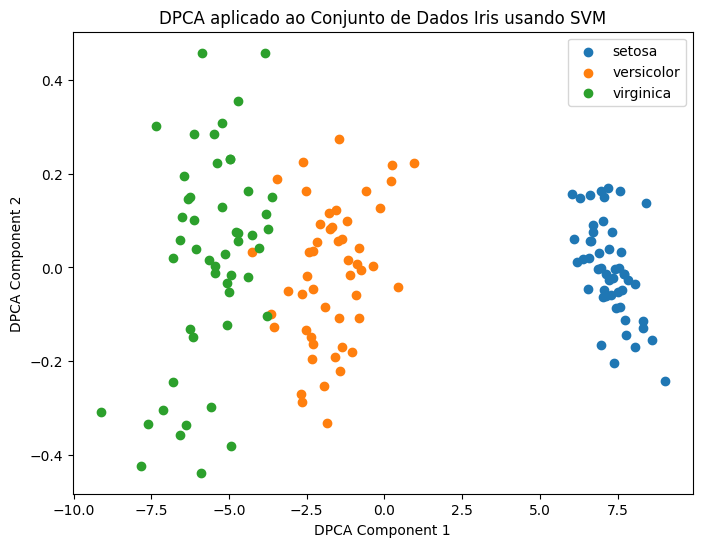

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Carregar o conjunto de dados Iris
data = load_iris()
X = data.data
y = data.target

# Passo 1: Treinar um SVM para encontrar os vetores de direção
svm = SVC(kernel='linear')  # Usando um SVM linear
svm.fit(X, y)

# Os vetores de direção são dados pelos coeficientes do SVM
modulos = np.linalg.norm(svm.coef_, axis=1)
indices_ordenados = np.argsort(modulos)[::-1]
directions = svm.coef_[indices_ordenados]

# Passo 2: Projetar os dados usando os vetores de direção do SVM
X_projected = np.dot(X, directions.T)

# Passo 3: Aplicar PCA nos dados projetados
pca = PCA(n_components=2)
X_dpca = pca.fit_transform(X_projected)

# Visualizar os resultados
plt.figure(figsize=(8, 6))
for class_value in np.unique(y):
    plt.scatter(X_dpca[y == class_value, 0], X_dpca[y == class_value, 1], label=data.target_names[class_value])

plt.xlabel('DPCA Component 1')
plt.ylabel('DPCA Component 2')
plt.title('DPCA aplicado ao Conjunto de Dados Iris usando SVM')
plt.legend()
plt.show()


In [18]:
indices_ordenados = np.argsort(np.abs(svm.coef_))  # Ordena pelo módulo e inverte a ordem
indices_ordenados

array([[0, 3, 1, 2],
       [0, 1, 3, 2],
       [0, 1, 3, 2]])

In [ ]:
directions2 = svm.coef_[indices_ordenados]
directions2

In [19]:
svm.coef_

array([[-0.04625854,  0.5211828 , -1.00304462, -0.46412978],
       [-0.00722313,  0.17894121, -0.53836459, -0.29239263],
       [ 0.59549776,  0.9739003 , -2.03099958, -2.00630267]])

In [21]:
# Calcular o módulo (norma) de cada vetor
modulos = np.linalg.norm(svm.coef_, axis=1)

# Ordenar os índices em ordem decrescente com base nos módulos
indices_ordenados = np.argsort(modulos)[::-1]

# Reordenar o array de vetores de acordo com os índices ordenados
vetores_ordenados = svm.coef_[indices_ordenados]